In [42]:
import pandas as pd

features = pd.read_csv('../data/output/bank+marketing-bank_encoded_features.csv')
target = pd.read_csv('../data/output/bank+marketing-bank_encoded_target.csv')

print(f'features shape: {features.shape}')
print(f'target shape: {target.shape}')

features shape: (4521, 37)
target shape: (4521, 1)


In [43]:
from sklearn.model_selection import train_test_split

test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=random_state)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (3616, 37)
X_test shape: (905, 37)
y_train shape: (3616, 1)
y_test shape: (905, 1)


In [1]:
from keras import models, activations, layers

model = models.Sequential(
    name="logistic-regression",
    layers=(
        layers.Dense(input_dim=5, units=5, activation="sigmoid"),
        layers.Activation(activations.sigmoid),
        layers.Dense(input_dim=5, units=1, activation="sigmoid"),
    )
)
model.summary()

Model: "logistic-regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 activation (Activation)     (None, 5)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 36 (144.00 Byte)
Trainable params: 36 (144.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras import losses, optimizers, metrics

model.compile(
    loss=losses.binary_crossentropy,
    optimizer=optimizers.legacy.Adam(),
    metrics=[
        "accuracy"
    ]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

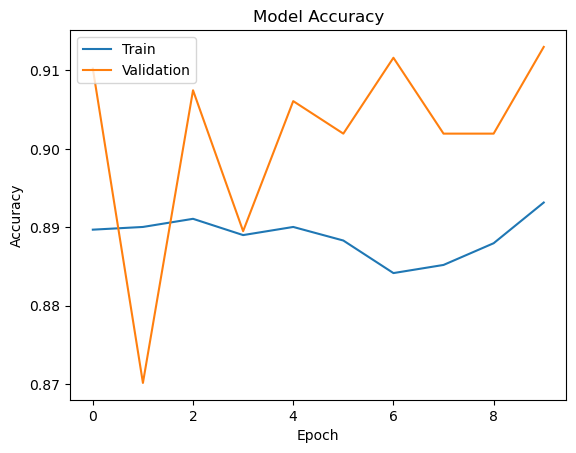

In [65]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

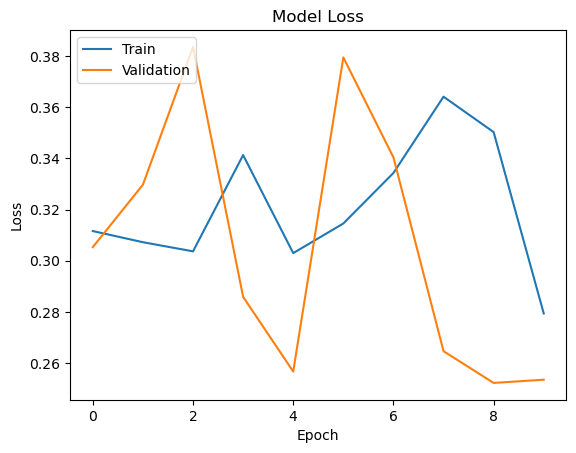

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [50]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

29/29 [==============================] - 0s 436us/step - loss: 0.4018 - accuracy: 0.0000e+00
Test loss: 0.4018, Test accuracy: 0.0000
